# Linear Regression

There are two types of supervised machine learning algorithms: Regression and classification. The former predicts continuous value outputs while the latter predicts discrete outputs. For instance, predicting the price of a house in dollars is a regression problem whereas predicting whether a tumor is malignant or benign is a classification problem. 

This notebook explains the assumptions of linear regression in detail. One of the most essential steps to take before applying linear regression and depending solely on accuracy scores is to check for these assumptions. If any of these assumptions is violated, then the forecasts, confidence intervals, and insights yielded by the regression model may be seriously biased or misleading.

**Table of contents**
<br>[1. The regression model is linear in parameters](#1.-The-regression-model-is-linear-in-parameters)
<br>[2. The mean of residuals is zero](#2.-The-mean-of-residuals-is-zero)
<br>[3. Homoscedasticity of residuals or equal variance](#3.-Homoscedasticity-of-residuals-or-equal-variance)
<br>[4. No autocorrelation of residuals](#4.-No-autocorrelation-of-residuals)
<br>[5. Normality of residuals](#5.-Normality-of-residuals)
<br>[6. No perfect multicollinearity](#6.-No-perfect-multicollinearity)


In [30]:
# Load packages

import numpy as np
import pandas as pd
import seaborn as sns
sns.set(
    context="notebook",
    palette="Spectral",
    style='darkgrid',
    font_scale=1.5,
    color_codes=True)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt

In [31]:
# Load dataset - http://www-bcf.usc.edu/~gareth/ISL/data.html

ad_data = pd.read_csv('Advertising.csv', index_col='Unnamed: 0')

Lets do some basic exploratory analysis of the dataset

In [32]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


In [33]:
ad_data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


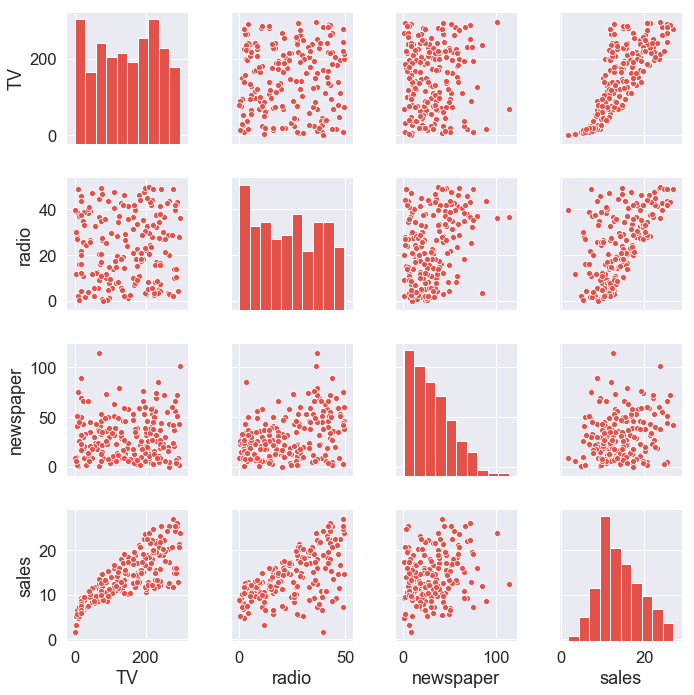

In [34]:
p = sns.pairplot(ad_data)

## Assumptions for Linear Regression

1. The regression model is linear in parameters
2. The mean of residuals is zero
3. Homoscedasticity of residuals or equal variance
4. No autocorrelation of residuals
5. Normality of residuals
6. No perfect multicollinearity


Some of the assumptions require us to have performed regression before we can check for them. So let's perform regression on our dataset.

### Fitting the linear model

In [35]:
x = ad_data.drop(["sales"],axis=1)
y = ad_data.sales

In [36]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(x, y)
y_pred = regr.predict(x)

In [37]:
print("R squared: {}".format(r2_score(y_true=y,y_pred=y_pred)))

R squared: 0.8972106381789522


In [38]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(
    metrics.mean_squared_error(y, y_pred)))

Mean Absolute Error: 1.252011229687068
Mean Squared Error: 2.784126314510936
Root Mean Squared Error: 1.6685701407225697



 ## 1. The regression model is linear in parameters


Linear regression needs the relationship between the independent and dependent variables to be linear.  A simple visual way of determining this is through the use of a pair plot to check the relation of the independent variables with the Sales

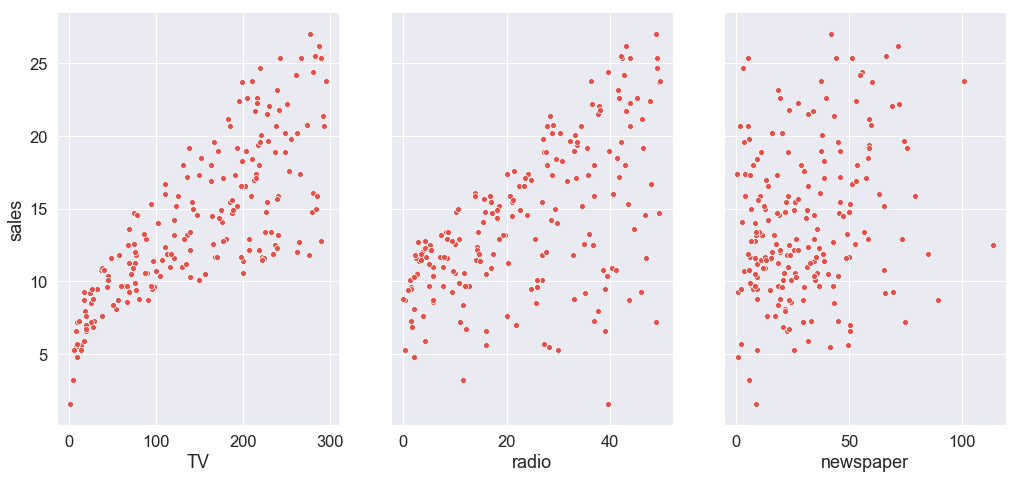

In [39]:
p = sns.pairplot(
    ad_data,
    x_vars=['TV', 'radio', 'newspaper'],
    y_vars='sales',
    size=7,
    aspect=0.7)

By looking at the plots we can see that with Sales, none of the independent variables form an accurately linear shape. TV and Radio do still better than Newspaper. We might consider applying a nonlinear transformation (log, polynomial) to the dependent and/or independent variables. Also we can look at the residual vs predicted value plot.

## 2. The mean of residuals is zero

Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero. So let's find out.


In [40]:
residuals = y.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -1.5987211554602255e-15


 Very close to zero so all good here.

## 3. Homoscedasticity of residuals or equal variance

Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.

Graphical Method: Firstly do the regression analysis and then plot the error terms against the predicted values( Yi^). If there is a definite pattern (like linear or quadratic or funnel shaped) obtained from the scatter plot then heteroscedasticity is present.

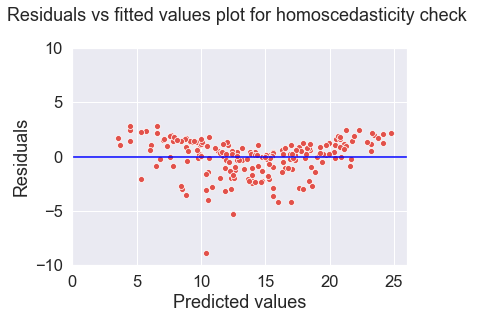

In [41]:
p = sns.scatterplot(y_pred, residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.ylim(-10, 10)
plt.xlim(0, 26)
p = sns.lineplot([0, 26], [0, 0], color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check \n')

We see that there is a slight curve. Now we will be applying tests. We need to keep in mind that if we want 95% confidence on our findings and tests then the p-value should be less than 0.05 to be able to reject the null hypothesis. 

Checking heteroscedasticity : Using Goldfeld Quandt we test for heteroscedasticity. It does this by dividing a dataset into two parts or groups, and hence the test is sometimes called a two-group test. Read more at [Goldfeld Quandt](https://en.wikipedia.org/wiki/Goldfeld%E2%80%93Quandt_test)

* Null Hypothesis: Error terms are homoscedastic
* Alternative Hypothesis: Error terms are heteroscedastic.

In [42]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, x)
lzip(name, test)

[('F statistic', 1.3444110321318348), ('p-value', 0.07338571632410308)]

Since p value is more than 0.05, we can't reject the null hypothesis but the value is very close. We can also try the Breusch-Pagan test statistic to check for heteroscedasticity. For now let us continue with the other tests.

## 4. No autocorrelation of residuals

 When the residuals are autocorrelated, it means that the current value is dependent of the previous (historic) values and that there is a definite unexplained pattern in the Y variable that shows up in the error terms. Though it is more evident in time series data.

In plain terms autocorrelation takes place when there's a pattern in the rows of the data. There should not be autocorrelation in the data so the error terms should not form any pattern.

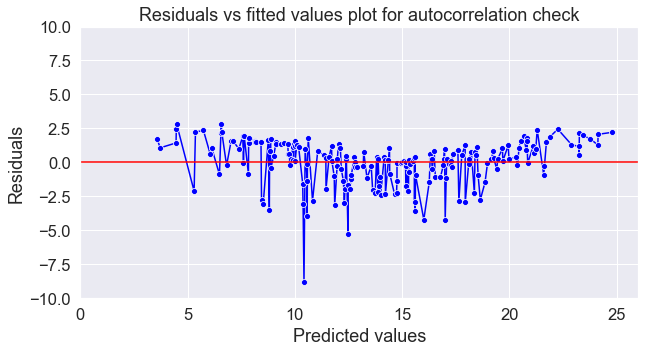

In [43]:
plt.figure(figsize=(10,5))
p = sns.lineplot(y_pred,residuals,marker='o',color='blue')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

Checking for autocorrelation To ensure the absence of autocorrelation we use Ljungbox test. The Ljung–Box test is a type of statistical test of whether any of a group of autocorrelations of a time series are different from zero.

* Null Hypothesis: Autocorrelation is absent.
* Alternative Hypothesis: Autocorrelation is present.

In [25]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals , lags = 40)[1])

0.5041767432843867

Since p value is more than 0.05 we can't reject the null hypothesis, error terms are not autocorrelated. Good.

In [27]:
import statsmodels.api as sm

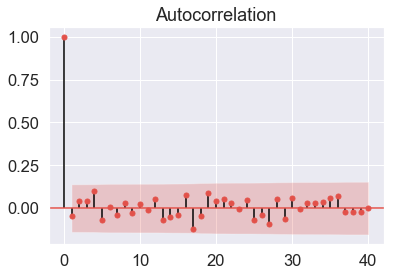

In [28]:
# autocorrelation
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

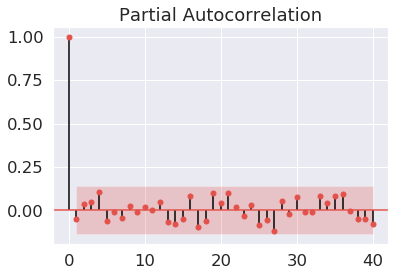

In [21]:
# partial autocorrelation
sm.graphics.tsa.plot_pacf(residuals, lags=40)
plt.show()

Apart from the line at zero both the above graphs have no point that is above the significant threshold therefore the results show no signs of autocorelation.

## 5. Normality of error residuals

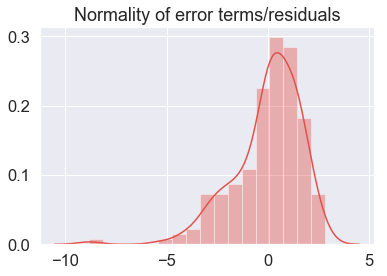

In [29]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

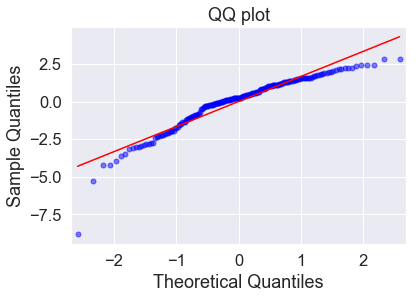

In [52]:
from statsmodels.graphics.gofplots import ProbPlot
QQ = ProbPlot(residuals)
fig = QQ.qqplot(alpha=0.5, markersize=5, line='s')
plt.title('QQ plot');

The residual terms seem normally distributed. Remember the central limit theorem which says that as the sample size increases the distribution tends to be normal. A skew is also visible from the plot.


Violations of normality often arise either because (a) the distributions of the dependent and/or independent variables are themselves significantly non-normal, and/or (b) the linearity assumption is violated. In such cases, a nonlinear transformation of variables might cure both problems. 
 
 
The dependent and independent variables in a regression model do not need to be normally distributed by themselves--only the prediction errors need to be normally distributed.  

## 6. No perfect multicollinearity

One more assumption for standard regression is that predictor variables should be linearly independent of each other. This problem is also called as collinearity or multicollinearity. In this situation strong correlations exist between among the predictor variables which may cause the erroneous estimates of the coefficients. It also impacts the stability of coefficient estimates as their values can change erroneously even on a slight changes in model specification. Multicollinearity does not affect the predictive power but individual predictor variables impact on the response variable could be calculated wrongly.

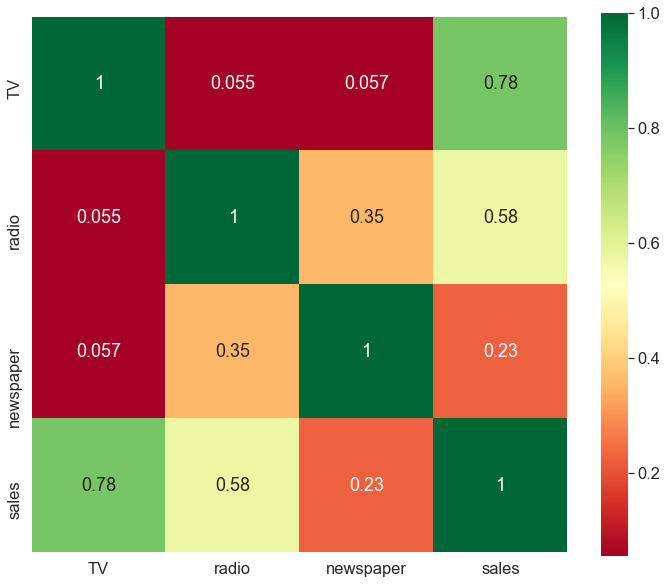

In [22]:
plt.figure(figsize=(12,10))
p=sns.heatmap(ad_data.corr(), annot=True,cmap='RdYlGn',square=True)  

 Look for correlation of rows where the dependent variable (Sales in this case) is not involved because if a variable is correlated with the dependent variable then this would be a good sign for our model. Correlation within dependent variables is what we need to look for and avoid. This data doesn't contain perfect multicollinearity among independent variables. In case there was any then we would try to remove one of the correlated variables depending on which was more important to our regression model.

We can perform the regression on latent variables provided by some data compression method like PCA or we can leave the model as it based on our use case of course, because the problem of multicollinearity does not affect the predicting power of a model if the predictor variables follow the same collinearity pattern in the new data used for prediction.  

Few other things that are important to keep in mind are, the regression model is correctly specified, the number of observations must be greater than number of Xs,the X variables and residuals are uncorrelated and the variability in X values is positive


#### References:
* https://www.statisticssolutions.com/assumptions-of-linear-regression/
* http://people.duke.edu/~rnau/testing.htm
* https://robert-alvarez.github.io/2018-06-04-diagnostic_plots/ (Great blog for R to Python converts)